# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

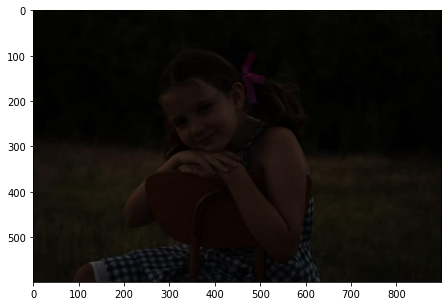

In [2]:
img = cv2.imread('/home/janko/Projects/robot_dreams/cv/Computer-Vision-v2/lesson_2/data/sea.jpg')
img = cv2.imread('/home/janko/Pictures/evening_town.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

In [3]:
# Define white patch and the coefficients
row, col = 485, 864 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

IndexError: index 864 is out of bounds for axis 1 with size 564

### Gray world
This algorithm assumes that a scene, on average, is gray.

96.5597436875 130.8550495 77.3798630625


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fd58d14b6d0>)

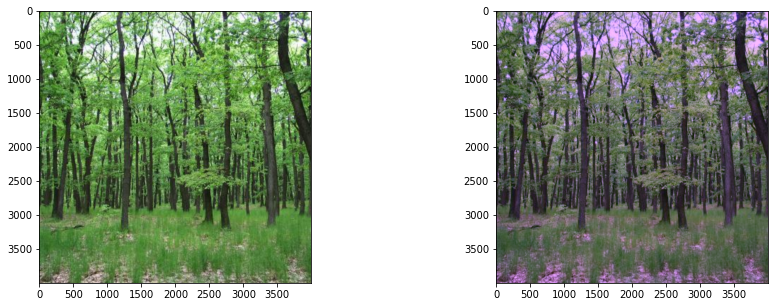

In [4]:
# Load your image
img = cv2.imread('/home/janko/Projects/robot_dreams/cv/Computer-Vision-v2/lesson_2/data/sea.jpg')
img = cv2.imread('/home/janko/Pictures/forest.jpg')
# img = cv2.resize(img, (4000, 4000))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[..., 0])
mean_g = np.mean(img[..., 1])
mean_b = np.mean(img[..., 2])

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.

print(mean_r, mean_g, mean_b)
kr = 1
kg = mean_r/mean_g 
kb = mean_r/mean_b 
coeffs = [kr, kg, kb]

# Apply color balancing and generate the balanced image
# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

16518761.0
1.0


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fee765624c0>)

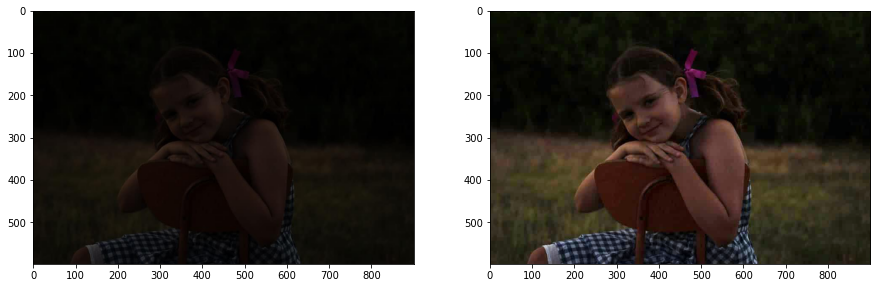

In [2]:
# Load your image
# img = cv2.imread('/home/janko/Projects/robot_dreams/cv/Computer-Vision-v2/lesson_2/data/sea.jpg')
img = cv2.imread('/home/janko/Pictures/evening_town.jpg')
# img = cv2.imread('/home/janko/Pictures/forest.jpg')
# img = cv2.imread('/home/janko/Pictures/screenshot.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[..., 0])
max_g = np.max(img[..., 1])
max_b = np.max(img[..., 2])

# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced[..., 0] = 255*(img[..., 0] / max_r)
balanced[..., 1] = 255*(img[..., 1] / max_g)
balanced[..., 2] = 255*(img[..., 2] / max_b)

balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)